# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore' )
import datetime
import math
import io
sns.set_style('darkgrid')
import plotly.express as px
import plotly.graph_objects as go


In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller





In [3]:
# downloading a data from 1 jan 2015 to till a date
import yfinance as yf

# Initializing the Ticker object
rel_ticker ='RELIANCE.NS'

# Extracting the history
df = yf.download(tickers= rel_ticker,start='2015-01-01')

[*********************100%%**********************]  1 of 1 completed


In [4]:
df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2015-01-01  405.186554  407.792389  403.975037  405.917999  382.812195   
2015-01-02  406.009430  409.643921  404.272217  404.843658  381.798981   
2015-01-05  404.592224  407.289520  399.609100  400.409149  377.616882   
2015-01-06  397.734741  399.106232  380.362396  382.236786  360.478912   
2015-01-07  382.693970  392.614471  382.648254  390.557220  368.325775   

              Volume  
Date                  
2015-01-01   1481821  
2015-01-02   3665683  
2015-01-05   5051970  
2015-01-06   9313990  
2015-01-07  10360156

In [5]:
df.tail()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2024-03-06  2986.899902  3018.000000  2957.000000  3006.000000  3006.000000   
2024-03-07  3005.949951  3006.199951  2951.100098  2957.850098  2957.850098   
2024-03-11  2978.000000  2978.000000  2927.000000  2933.199951  2933.199951   
2024-03-12  2933.199951  2976.000000  2930.050049  2950.850098  2950.850098   
2024-03-13  2959.550049  2966.199951  2855.550049  2864.350098  2864.350098   

             Volume  
Date                 
2024-03-06  3902838  
2024-03-07  4157863  
2024-03-11  5638565  
2024-03-12  4716339  
2024-03-13  6760641

In [6]:
df.shape

(2271, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2271 entries, 2015-01-01 to 2024-03-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2271 non-null   float64
 1   High       2271 non-null   float64
 2   Low        2271 non-null   float64
 3   Close      2271 non-null   float64
 4   Adj Close  2271 non-null   float64
 5   Volume     2271 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 124.2 KB


In [8]:
df.describe()

Open         High          Low        Close    Adj Close  \
count  2271.000000  2271.000000  2271.000000  2271.000000  2271.000000   
mean   1370.705853  1385.118748  1355.502402  1369.778123  1352.995181   
std     768.064540   775.059920   760.482058   767.578615   771.570528   
min     373.322052   373.824921   364.110138   370.647614   349.549469   
25%     609.619904   614.065857   603.139557   607.962677   587.116577   
50%    1184.975220  1202.347534  1174.003174  1185.706665  1165.057007   
75%    2171.818115  2195.793213  2148.512573  2174.379517  2163.230713   
max    3011.550049  3024.899902  2974.449951  3014.800049  3014.800049   

             Volume  
count  2.271000e+03  
mean   9.419372e+06  
std    6.948662e+06  
min    8.528280e+05  
25%    5.456808e+06  
50%    7.448303e+06  
75%    1.073288e+07  
max    7.134168e+07

In [9]:
df_new = df.reset_index()

In [10]:
df_new.head()

Date        Open        High         Low       Close   Adj Close  \
0 2015-01-01  405.186554  407.792389  403.975037  405.917999  382.812195   
1 2015-01-02  406.009430  409.643921  404.272217  404.843658  381.798981   
2 2015-01-05  404.592224  407.289520  399.609100  400.409149  377.616882   
3 2015-01-06  397.734741  399.106232  380.362396  382.236786  360.478912   
4 2015-01-07  382.693970  392.614471  382.648254  390.557220  368.325775   

     Volume  
0   1481821  
1   3665683  
2   5051970  
3   9313990  
4  10360156

## Creating a some technical Indicators

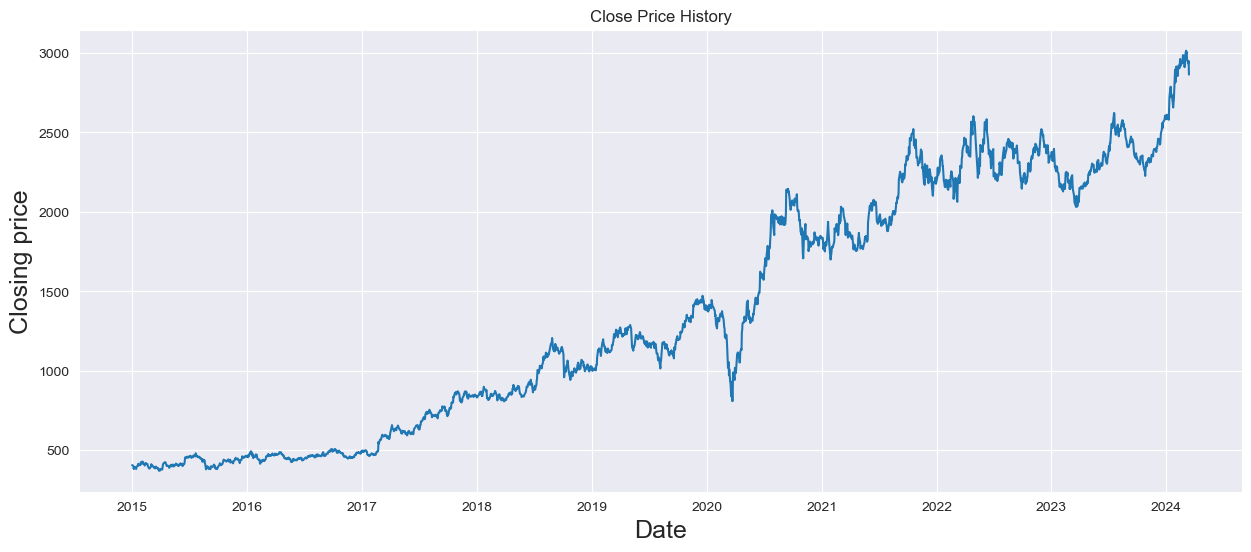

In [11]:
# ploting close price
import datetime
plt.figure(figsize=(15,6))
plt.title("Close Price History")
plt.plot(df['Close'])
plt.xlabel("Date",fontsize = 18)
plt.ylabel("Closing price",fontsize = 18)
plt.show()

In [26]:
def get_technical_indicators(dataset): #function to generate feature technical indicators
    
    
    # Create 7 and 21 days Moving Average
    dataset['ma7'] = dataset['Close'].rolling(window = 7).mean()
    dataset['ma21'] = dataset['Close'].rolling(window = 21).mean()
    
    #Create MACD
    dataset['26ema'] = dataset['Close'].ewm(span=26).mean()
    dataset['12ema'] = dataset['Close'].ewm(span=12).mean()
    dataset['MACD'] = (dataset['12ema']-dataset['26ema'])
    
    #Create Bollinger Bands
    dataset['20sd'] = dataset['Close'].rolling(window = 20).std()
    dataset['upper_band'] = (dataset['Close'].rolling(window = 20).mean()) + (dataset['20sd']*2)
    dataset['lower_band'] = (dataset['Close'].rolling(window = 20).mean()) - (dataset['20sd']*2)
    
    
    #Create Exponential moving average
    dataset['ema'] = dataset['Close'].ewm(com=0.5).mean()
    
    #Create Momentum
    dataset['momentum'] = (dataset['Close']/100)-1
    
    
    
    return dataset
    

In [27]:
updated_df = get_technical_indicators(df)

In [28]:
updated_df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2015-01-01  405.186554  407.792389  403.975037  405.917999  382.812195   
2015-01-02  406.009430  409.643921  404.272217  404.843658  381.798981   
2015-01-05  404.592224  407.289520  399.609100  400.409149  377.616882   
2015-01-06  397.734741  399.106232  380.362396  382.236786  360.478912   
2015-01-07  382.693970  392.614471  382.648254  390.557220  368.325775   

              Volume  Close: 30 Day Mean  ma7  ma21       26ema       12ema  \
Date                                                                          
2015-01-01   1481821                 NaN  NaN   NaN  405.917999  405.917999   
2015-01-02   3665683                 NaN  NaN   NaN  405.360168  405.336065   
2015-01-05   5051970                 NaN  NaN   NaN  403.581315  403.413088   
2015-01-06   9313990                 NaN  NaN   NaN  397.614318  396.728557   
2015-01-07  10360156                 NaN  NaN   NaN  395.977748  395.051827   

                MACD  20sd  upper_band  lower_band         ema  momentum  
Date                                                                      
2015-01-01  0.000000   NaN         NaN         NaN  405.917999  3.059180  
2015-01-02 -0.024104   NaN         NaN         NaN  405.112244  3.048437  
2015-01-05 -0.168227   NaN         NaN         NaN  401.856255  3.004091  
2015-01-06 -0.885760   NaN         NaN         NaN  388.613113  2.822368  
2015-01-07 -0.925921   NaN         NaN         NaN  389.914540  2.905572

In [12]:
fig = px.line(x=df.index, y=df['Close'])

# Updating layout
fig.update_layout(
    title='Close Prices',
    xaxis_title='Date',
    yaxis_title='Price',
    template='plotly_white',
    xaxis_rangeslider_visible=True
)

# Showing figure
fig.show()

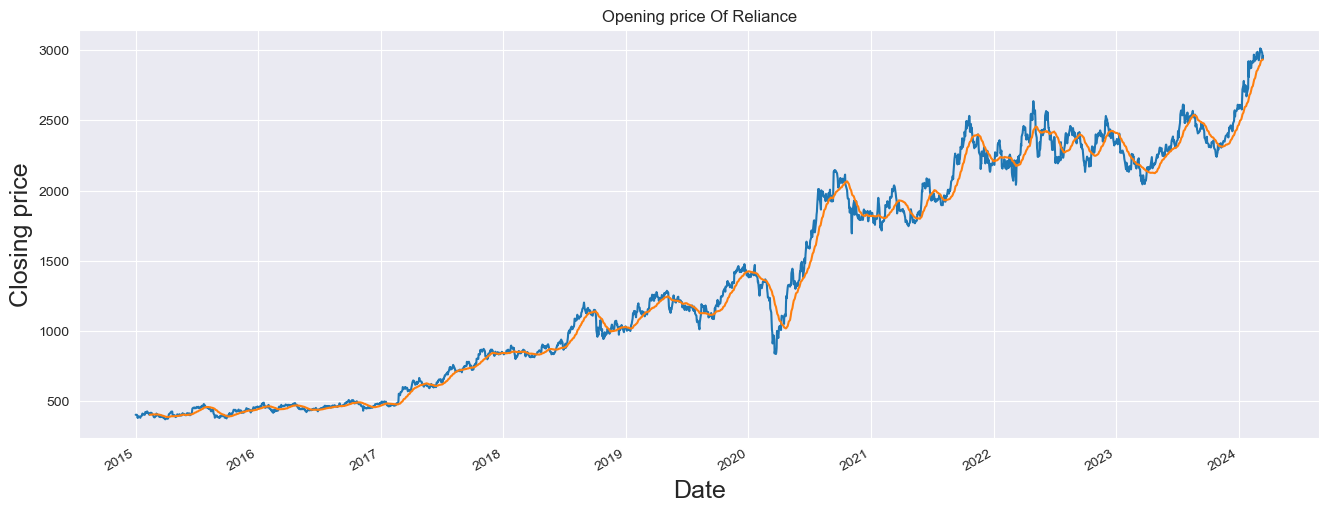

In [13]:
# 30 days moving average
df['Open'].plot(figsize=(16,6))
df.rolling(window=30).mean()['Close'].plot(label="30-day Moving Average")
plt.title("Opening price Of Reliance")
plt.xlabel("Date",fontsize = 18)
plt.ylabel("Closing price",fontsize = 18)
plt.show()

In [29]:
def plot_technical_indicators(dataset, last_days):
    plt.figure(figsize=(16, 10), dpi=100)
    shape_0 = dataset.shape[0]
    xmacd_ = shape_0-last_days
    
    dataset = dataset.iloc[-last_days:, :]
    x_ = range(3, dataset.shape[0])
    x_ =list(dataset.index)
    
    # Plot first subplot
    plt.subplot(2, 1, 1)
    plt.plot(dataset['ma7'],label='MA 7', color='g',linestyle='--')
    plt.plot(dataset['Close'],label='Closing Price', color='b')
    plt.plot(dataset['ma21'],label='MA 21', color='r',linestyle='--')
    plt.plot(dataset['upper_band'],label='Upper Band', color='c')
    plt.plot(dataset['lower_band'],label='Lower Band', color='c')
    plt.fill_between(x_, dataset['lower_band'], dataset['upper_band'], alpha=0.35)
    plt.title('Technical indicators for Relieance - last {} days.'.format(last_days))
    plt.ylabel('INR')
    plt.legend()

    # Plot second subplot
    plt.subplot(2, 1, 2)
    plt.title('MACD')
    plt.plot(dataset['MACD'],label='MACD', linestyle='-.')
    plt.hlines(15, xmacd_, shape_0, colors='g', linestyles='--')
    plt.hlines(-15, xmacd_, shape_0, colors='g', linestyles='--')
    plt.plot(dataset['momentum'],label='Momentum', color='b',linestyle='-')

    plt.legend()
    plt.show()

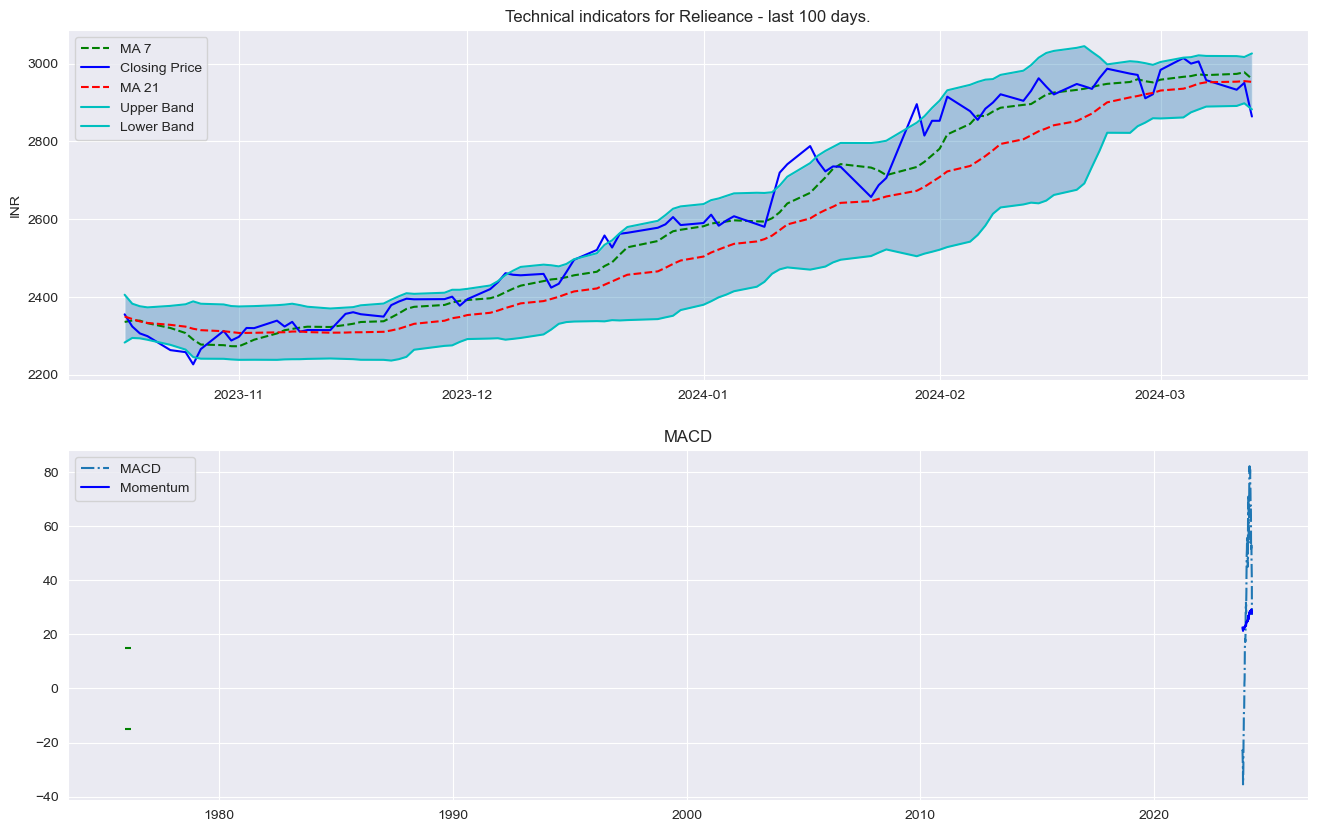

In [30]:
plot_technical_indicators(updated_df, 100)

In [14]:
monthvise= df_new.groupby(df_new['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

Open        Close
Date                               
January    1365.300196  1363.627628
February   1396.238190  1396.255925
March      1278.623576  1278.403055
April      1239.385712  1240.092319
May        1258.370674  1255.948297
June       1320.399131  1320.558159
July       1354.127568  1354.305522
August     1410.334070  1409.410638
September  1455.309823  1454.575669
October    1450.858930  1448.533940
November   1448.471835  1446.714955
December   1467.684915  1465.641522

In [15]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Stock open and close price')
fig.show()


In [16]:
df_new.groupby(df_new['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = df_new.groupby(df_new['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = df_new.groupby(df_new['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Relieance high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Relieance low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

Text(0.5, 1.0, 'Closing Price')

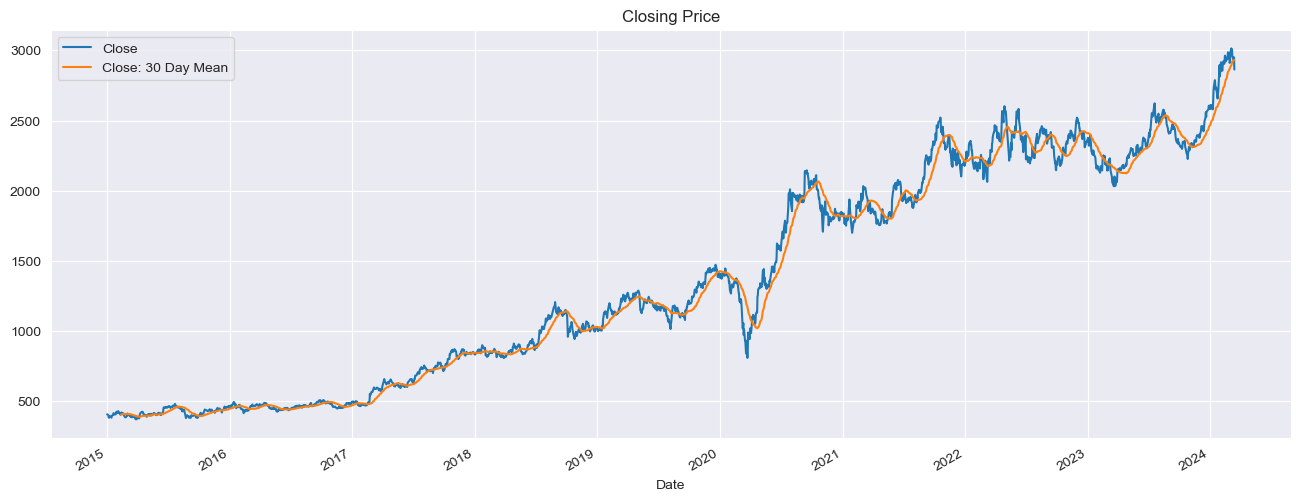

In [17]:
df['Close: 30 Day Mean']=df['Close'].rolling(window=30).mean()
df[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))
plt.title("Closing Price")

In [18]:
from itertools import cycle
names = cycle(['Open','Stock Close Price','Stock High Price','Stock Low Price'])
fig = px.line(df_new, x=df_new.Date, y=[df_new['Open'], df_new['Close'], 
                                          df_new['High'], df_new['Low']],
             labels={'date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [19]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.graph_objs import Line

fig = make_subplots(rows=4, cols=1,subplot_titles=('Open','High','Low','Close'))

fig.add_trace(
    Line(x=df.index, y=df.Open),
    row=1, col=1
)

fig.add_trace(
    Line(x=df.index, y=df.High),
    row=2, col=1
)

fig.add_trace(
    Line(x=df.index, y=df.Low),
    row=3, col=1
)

fig.add_trace(
    go.Line(x=df.index, y=df.Close),
    row=4, col=1
)

fig.update_layout(height=1400, width=1000, title_text="OHLC Line Plots")

fig.show()

C:\Users\Sumeet Maheshwari\anaconda3\Lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [20]:
# **candle Plot**
# Creating the figure object
import plotly.graph_objects as go
fig = go.Figure()

# Creating the Candlestick plot
fig.add_trace(go.Candlestick(
    x=df.index,
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close']
))

# Updating layout
fig.update_layout(
    title='Candlestick Chart',
    xaxis_title='Date',
    yaxis_title='Price',
    template='plotly_white',
    xaxis_rangeslider_visible=True
)
fig.show()

In [21]:
from statsmodels.tsa.stattools import adfuller
ts = df['Adj Close']
# assuming your time series data is stored in a variable called 'ts'
result = adfuller(ts)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.058027
p-value: 0.953462
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


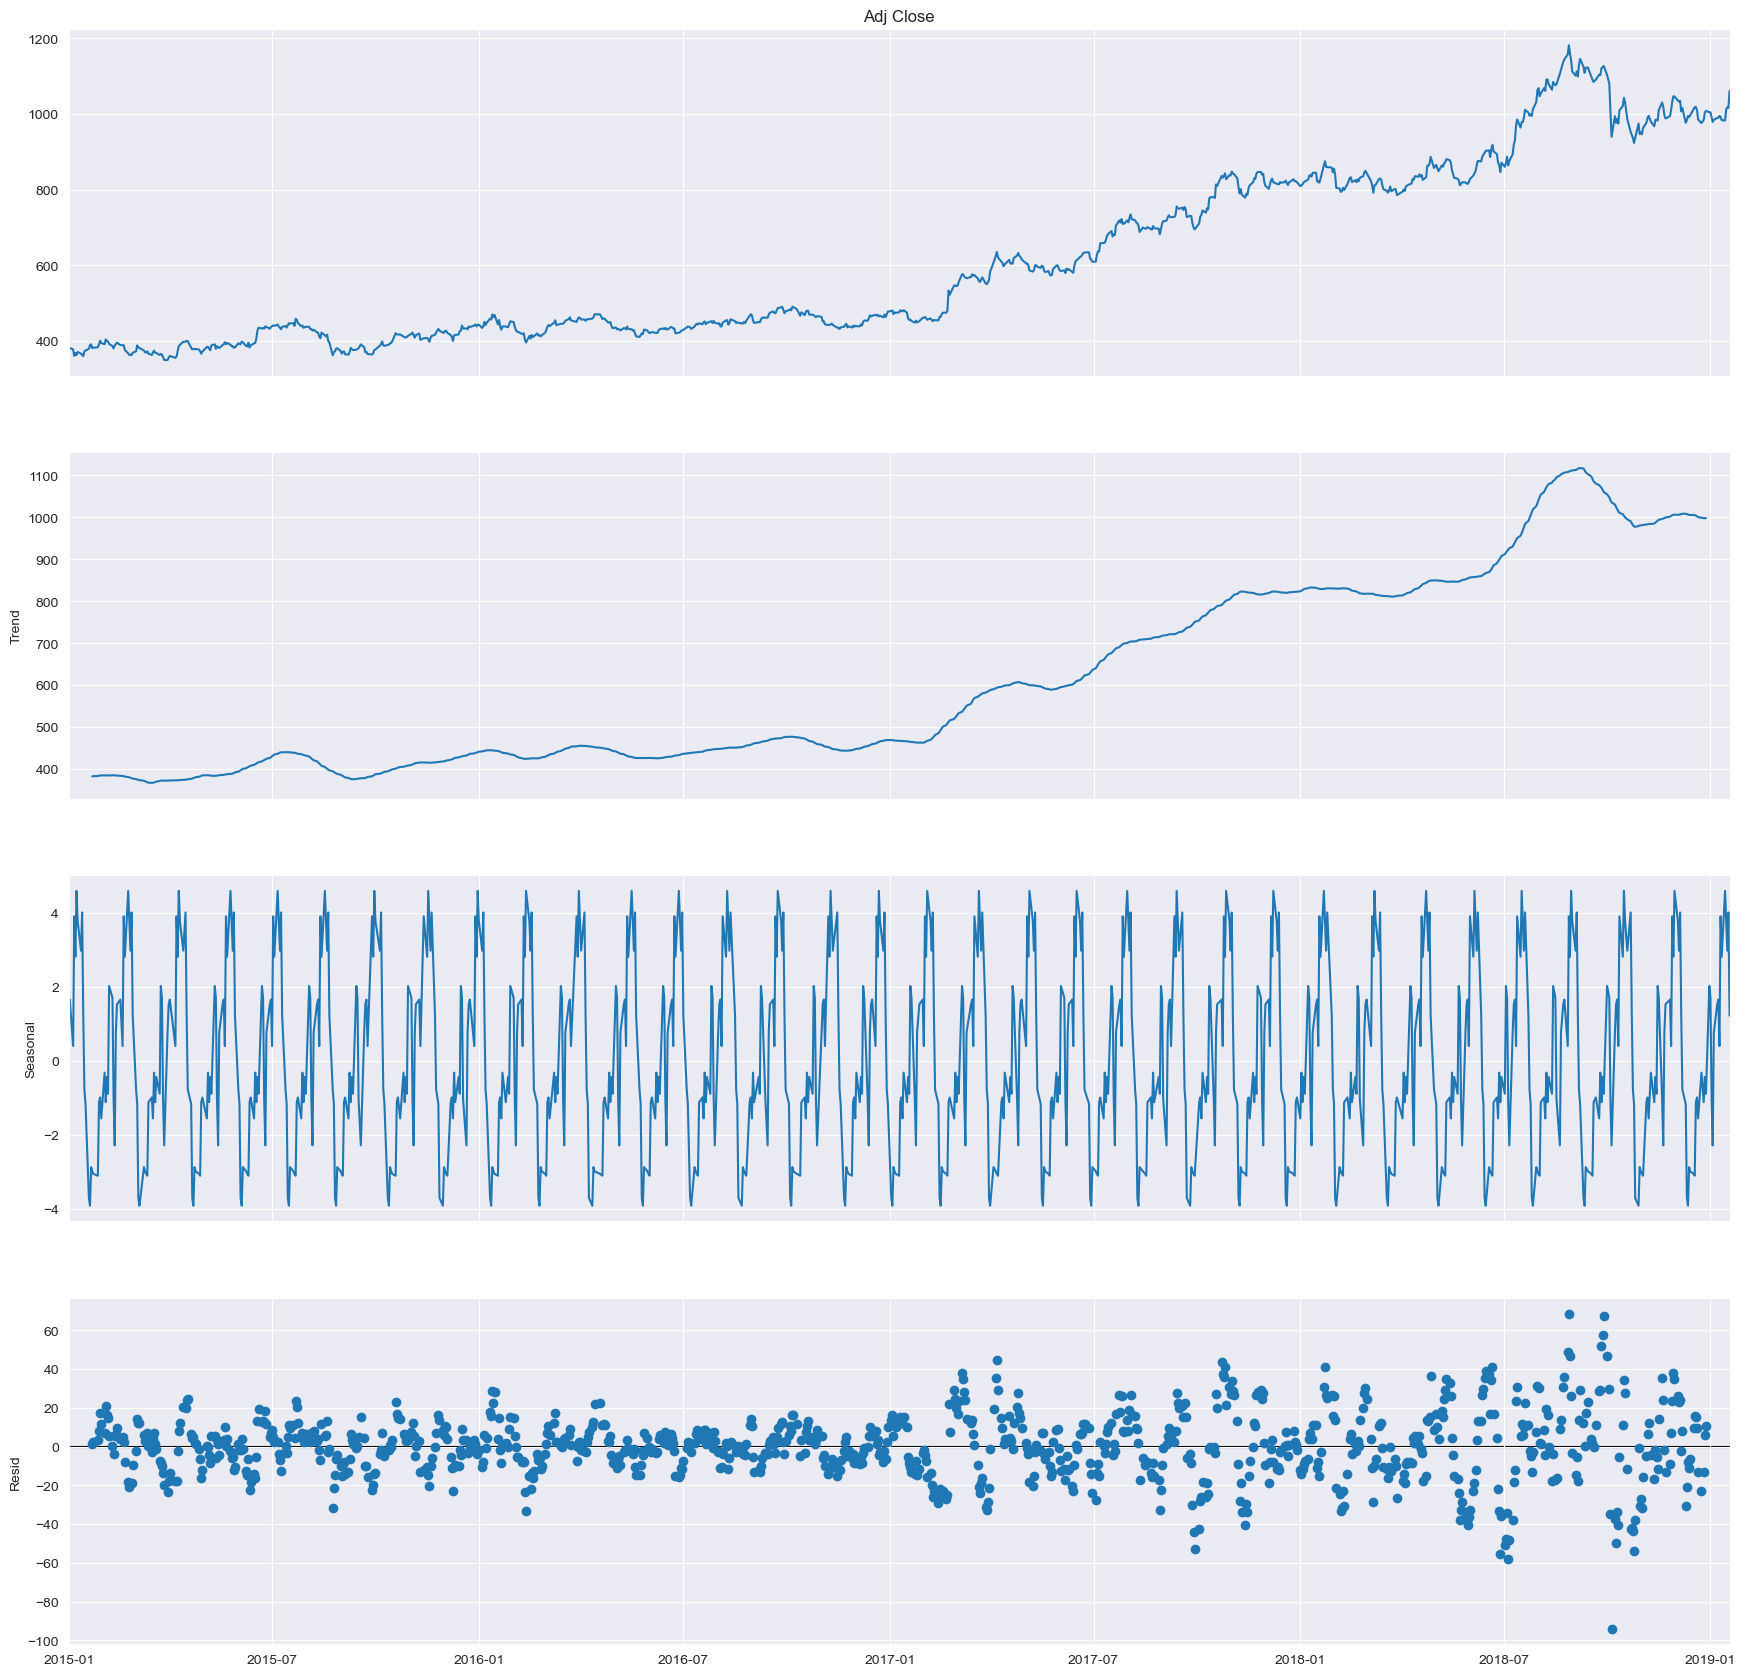

In [22]:
#only first 5000 values are taken because it was looking very crowded
result = seasonal_decompose(df["Adj Close"].head(1000), model='additive', period = 30)
fig = go.Figure()  
fig = result.plot()  
fig.set_size_inches(20, 19)

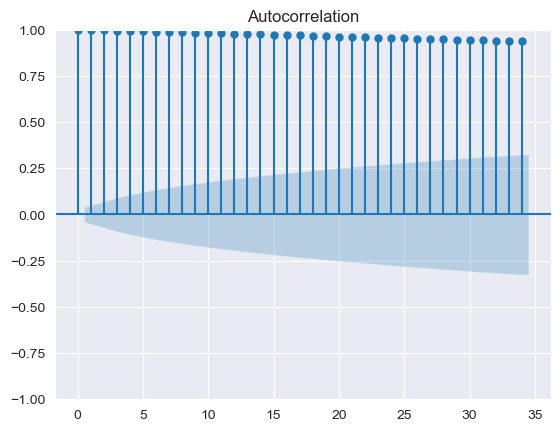

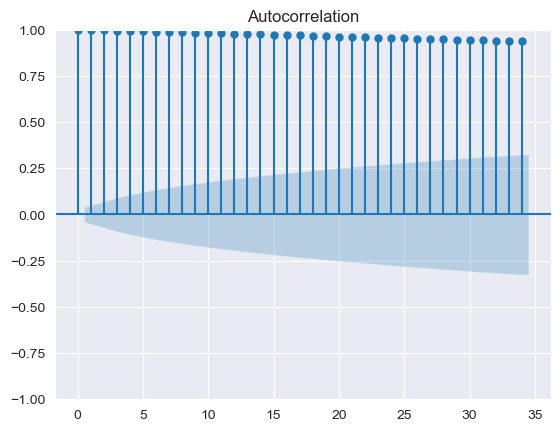

In [23]:
plot_acf(df['Adj Close'], alpha = 0.05)

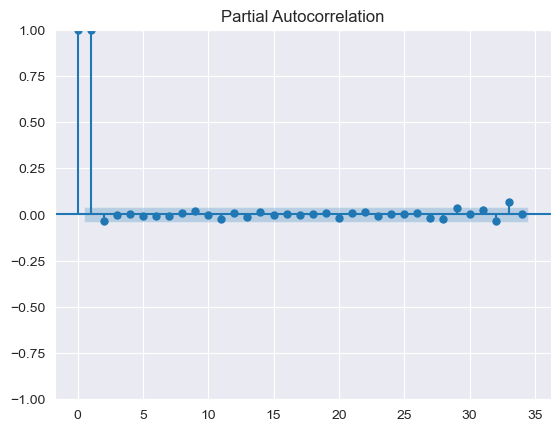

In [24]:
plot_pacf(df['Adj Close'], alpha = 0.05);

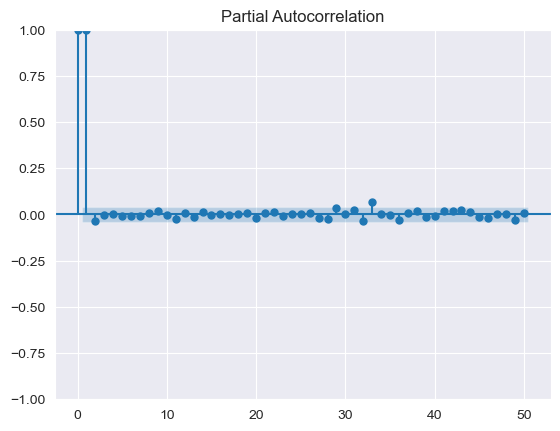

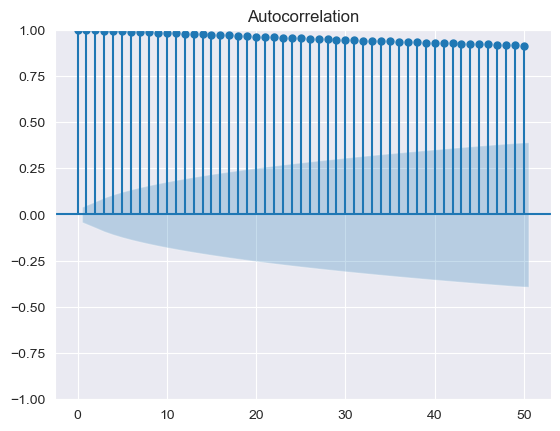

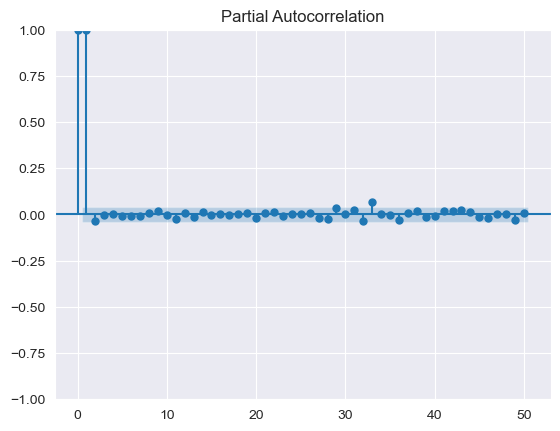

In [25]:

import statsmodels.api as sm

p = 1
d = 1
q = 1

train_np = df['Adj Close'].values.astype('float64')
model = sm.tsa.ARIMA(train_np, order=(p, d, q))


# Define the order of differencing, AR, and MA terms
model_fit = model.fit()

# Plot ACF and PACF
plot_acf(train_np, lags=50)
plot_pacf(train_np, lags=50)

# Model Building Using ARIMA

In [34]:
from statsmodels.tsa.arima.model import ARIMA

series = df['Close']
model = ARIMA(series, order=(5, 1, 0))
model_fit = model.fit()
model_fit.summary()

C:\Users\Sumeet Maheshwari\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Sumeet Maheshwari\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Sumeet Maheshwari\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2271
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -10583.212
Date:                Thu, 14 Mar 2024   AIC                          21178.424
Time:                        00:17:50   BIC                          21212.789
Sample:                             0   HQIC                         21190.961
                               - 2271                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0184      0.015      1.222      0.222      -0.011       0.048
ar.L2          0.0258      0.015      1.774      0.076      -0.003       0.054
ar.L3         -0.0542      0.014     -3.934      0.000      -0.081      -0.027
ar.L4         -0.0232      0.015     -1.519      0.129      -0.053       0.007
ar.L5          0.0240      0.016      1.506      0.132      -0.007       0.055
sigma2       657.4805      9.337     70.418      0.000     639.181     675.780
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              4501.66
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):              16.59   Skew:                             0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

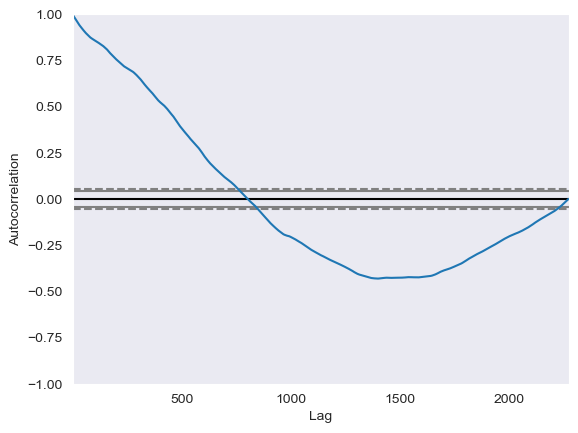

<Figure size 800x560 with 0 Axes>

In [35]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
plt.figure(figsize=(10, 7), dpi=80)
plt.show()

In [ ]:
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)


In [ ]:
update_df['ARIMA'] = pd.DataFrame(predictions)

In [ ]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

In [ ]:

# Plot the predicted (from ARIMA) and real prices

plt.figure(figsize=(12, 6), dpi=100)
plt.plot(test, color='black', label='Real')
plt.plot(predictions, color='yellow', label='Predicted')
plt.xlabel('Days')
plt.ylabel('inr')
plt.title('Figure 5: ARIMA model on Relieance stock')
plt.legend()
plt.show()